In [14]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [15]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in Data 8.


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

### Ecological correlations

Here is another example of an ecological correlation, this time with the vote count so far from the 2020 election.  We'll look at state-level results, in particular, how many voted for Biden, and its relationship to the median income in that state.

In [16]:
election20 = Table.read_table('election2020_state_prelim.csv')
election20

State,Median Income,Percent voting for Biden
Alabama,47221,0.363
Alaska,75723,0.33
Arizona,57100,0.5
Arkansas,45907,0.345
California,66637,0.651
Colorado,70566,0.552
Connecticut,75923,0.587
Delaware,58046,0.588
Florida,51176,0.478
Georgia,53527,0.494


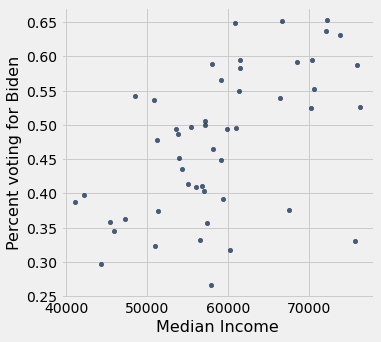

In [17]:
election20.scatter('Median Income', 'Percent voting for Biden')

Look at that correlation between income and voting for Biden!  Wait... sanity check time -- people with a higher income were more likely to vote for the Democratic candidate?  Does that sound right?

In [18]:
party = Table.read_table('party_affiliation2016.csv')
party

Income,Republican%,Democrat%,No leaning%
"Below 30,000",32,60,8
"30,000 to 39,999",47,46,7
"50,000 to 74,999",49,44,6
"75,000 to 99,999",48,44,8
"40,000 to 49,999",47,46,7
"100,000 to 149,999",51,45,4
"Above 150,000",46,48,6


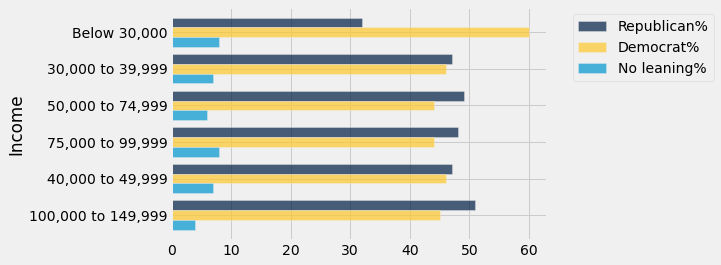

In [19]:
party.exclude(6).barh('Income')

We can see now the resolution: individuals with a lower income are more likely to vote for the Democrat; but states with a lower median income are less likely to vote for the Democrat.  Why?  Because of confounding factors, basically: urban states are more likely to vote for the Democrat, and more likely to have a higher median income, but that only holds at the state level, not at the individual level.  The ecological fallacy is the mistake of assuming that associations at the group level imply that the association holds for individuals, too.

## Prediction lines

Let's look at some synthetic data that is generated to have a particular correlation coefficient.  We'll start with $r=0.99$.

In [20]:
example = r_table(0.99)
example.show(3)

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316


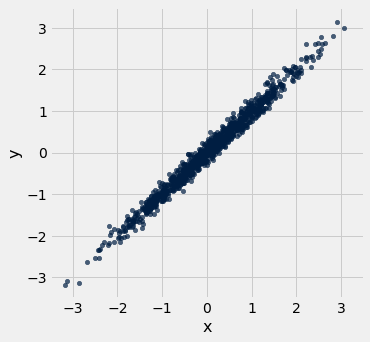

In [21]:
example.scatter('x', 'y')
resize_window()

Let's look at the predictions that nearest neighbor regression would give us on this dataset.

In [22]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))   

In [23]:
nn_prediction_example(-2.25)

-2.1476337989800522

In [24]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

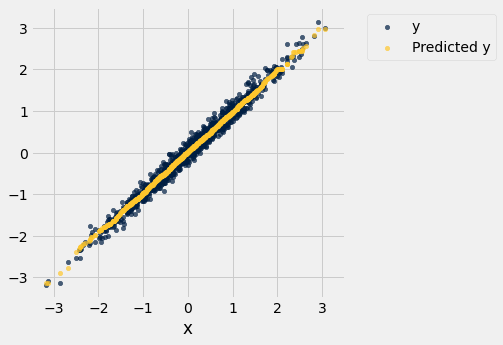

In [25]:
example.scatter('x')
resize_window()

We've drawn the data, and the prediction line obtained by nearest neighbor regression (shown in yellow).  The prediction line looks like nearly a straight line, but it's a little squiggly.  So, let's draw a straight line in blue, with slope 1.

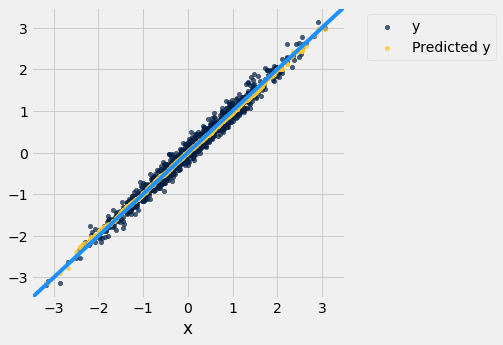

In [26]:
example.scatter('x')
draw_line(slope=1, color='dodgerblue')
resize_window()

What do you think?  Do you think the blue line is a good fit to the data?  If we were trying to fit a perfectly straight line (instead of a slightly squiggly line, like the one obtained from nearest neighbor regression), would it be the best choice?

Let's try to figure that out, by repeating the same procedure, but this time with datasets created to have a different value of the correlation coefficient.  We'll start with $r=0$.

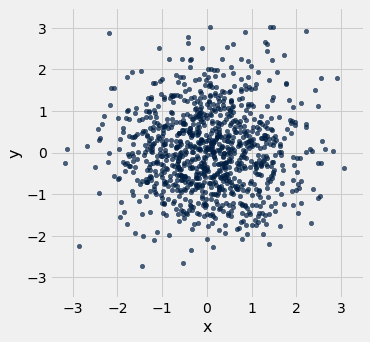

In [27]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

In [28]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

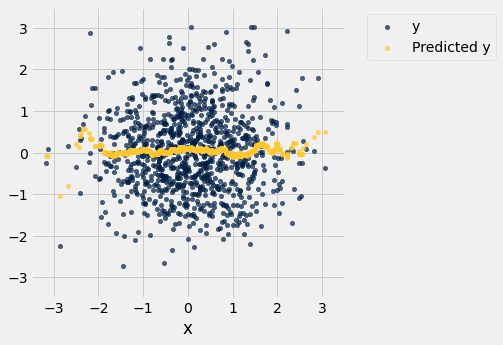

In [29]:
example = example.with_column(
    'Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
#draw_line(slope = 0)
resize_window()

The prediction line obtained from nearest neighbor regression is nearly horizontal, but it's a bit squiggly (especially at extreme values of x, where we don't have as much data to help make a good prediction).  If you had to fit a straight line to that dataset, what line would you use?

Let's do it again, this time with a dataset with $r=0.5$.

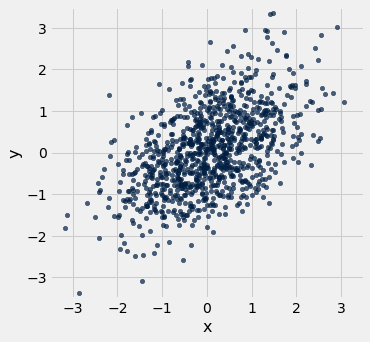

In [30]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

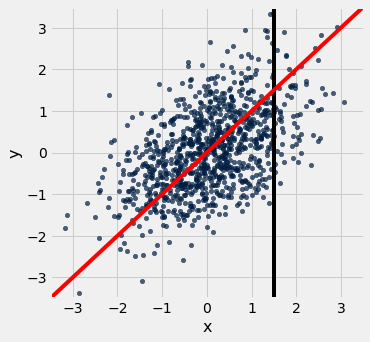

In [31]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()
draw_vertical_line(1.5)
draw_line(slope=1, intercept=0)

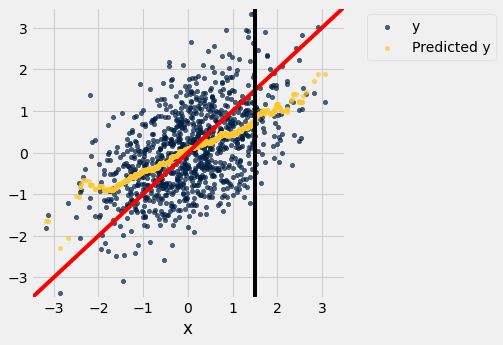

In [32]:
example = example.with_column('Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=1)
draw_vertical_line(1.5)
resize_window()

You can see the prediction line in yellow, and a straight line with slope 1 shown in red.  Does it look like the red line is a good fit to the data?  Would it be a good prediction line, if we wanted to use a perfectly straight line?

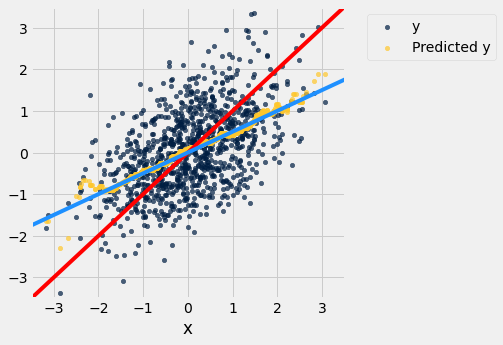

In [33]:
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.5, intercept=0, color='dodgerblue')
resize_window()

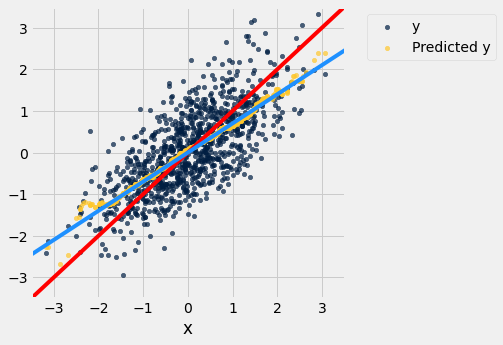

In [34]:
example = r_table(0.7)
example = example.with_column('Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.7, intercept=0, color='dodgerblue')
resize_window()

## Linear regression: defining the line

In [35]:
# Copy-pasted from above
def standard_units(x):
    """ Converts an array x to standard units """
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)


In [36]:
def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

In [37]:
example = r_table(0.5)
slope(example, 'x', 'y')

0.5022638281625915

## Galton height data

In [38]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight'))
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [39]:
def nn_prediction_galton(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    neighbors = heights.where(
        'MidParent', are.between(h - 0.5, h + 0.5))
    return np.mean(neighbors.column('Child'))

In [40]:
heights_with_predictions = heights.with_column(
    'Nearest neighbor prediction', 
    heights.apply(nn_prediction_galton, 'MidParent'))

In [41]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

In [42]:
heights.take(123)

MidParent,Child
69.48,71.5


We'll use this to make a prediction for child height, using the linear regression model we inferred.

In [43]:
heights_with_predictions.where('MidParent', are.equal_to(69.48))

MidParent,Child,Nearest neighbor prediction
69.48,64,66.7588
69.48,74,66.7588
69.48,72,66.7588
69.48,69,66.7588
69.48,67.5,66.7588
69.48,63.5,66.7588
69.48,72,66.7588
69.48,71.5,66.7588
69.48,71.5,66.7588
69.48,70,66.7588


In [44]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', 
    galton_slope*heights.column('MidParent') + galton_intercept
)
heights_with_predictions

MidParent,Child,Nearest neighbor prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


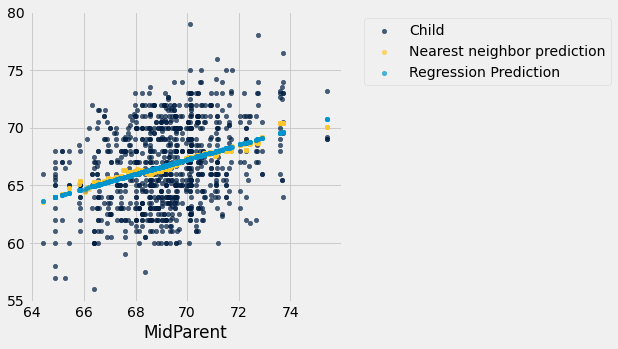

In [45]:
heights_with_predictions.scatter('MidParent')